## DAT405 Introduction to Data Science and AI
# Assignment 3: Clustering

Student name | Hours spent on the tasks
------------ | -------------
Lenia Malki | 12
Maële Belmont | 12

- [helpful video](https://www.youtube.com/watch?v=QXOkPvFM6NU)

## Setup
Python modules need to be loaded to solve the tasks.

In [84]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import random
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

## Task 1
#### Draw a scatter plot that shows the phi and psi combinations in the data file.

Text(0.5, 1.0, 'Figure 1: phi and psi combinations')

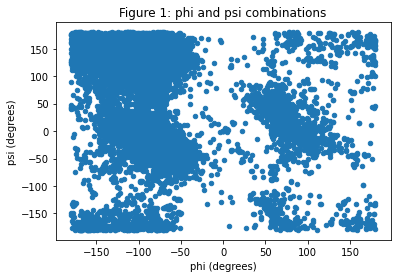

In [85]:
#Read the csv file containing the downloaded data
data = pd.read_csv('data_all.csv')

#Figure
data.plot.scatter(x='phi', y='psi')
plt.xlabel('phi (degrees)')
plt.ylabel('psi (degrees)')
plt.title('Figure 1: phi and psi combinations')

## Task 2

#### Use the K-means clustering method to cluster the phi and psi angle combinations in the data file.

#### a.	Experiment with different values of K. Suggest an appropriate value of K for this task and motivate this choice.

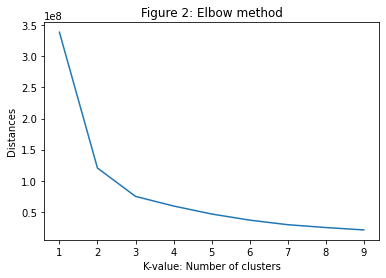

In [4]:
#We can find a suitable k-value with the help of the elbow method

#Take out only coordinates
tempArray= data[["phi", "psi"]]

calculatedDistances = []
#Calculate distances
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(tempArray)
    calculatedDistances.append(kmeanModel.inertia_)
    
#Plot the elbow-graph
plt.plot(K, calculatedDistances)
plt.xticks(range(1, 10))
plt.xlabel('K-value: Number of clusters')
plt.ylabel('Distances')
plt.title('Figure 2: Elbow method')
plt.show()

As shown in Figure 2, a k-value of 2 or 3 would be appropriate, since it is where the so called "elbow" is found. We can perfom k-means clustering with both k-values in order to evaluate the case further.  

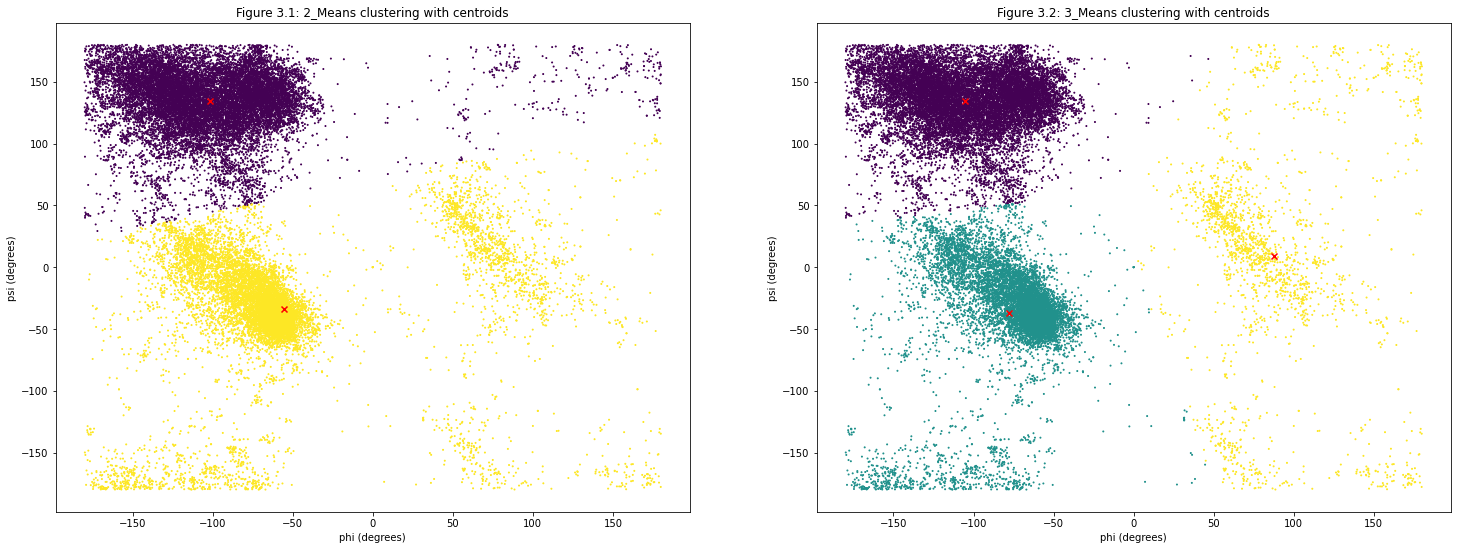

In [5]:
#Create figure and stack subplots next to each other
fig, axs = plt.subplots(1, 2)

# Perform K-Means clustering by specifying the number of clusters and fiting the data
kmeans_2 = KMeans(n_clusters=2, random_state = 0).fit(tempArray)

#Scatter the dots and color depending on repsective cluster
axs[0].scatter(tempArray["phi"], tempArray["psi"],s = 1, c=kmeans_2.labels_.astype(float))
#Setting the title of the subgraph
axs[0].set_title('Figure 3.1: 2_Means clustering with centroids')
#Setting the x and y-labels of the subgraph
axs[0].set(xlabel = 'phi (degrees)', ylabel = 'psi (degrees)')
#Scatter the graph using kmeans and mark out the centroids
axs[0].scatter(kmeans_2.cluster_centers_[:, 0], kmeans_2.cluster_centers_[:, 1], c='red', marker='x')

#Repeat same steps as above with k = 3
kmeans_3 = KMeans(n_clusters=3, random_state = 0).fit(tempArray)
axs[1].scatter(tempArray["phi"], tempArray["psi"],s = 1, c=kmeans_3.labels_.astype(float))
axs[1].set_title('Figure 3.2: 3_Means clustering with centroids')
axs[1].set(xlabel = 'phi (degrees)', ylabel = 'psi (degrees)')
axs[1].scatter(kmeans_3.cluster_centers_[:, 0], kmeans_3.cluster_centers_[:, 1], c='red', marker='x')

# Set figure size
fig.set_figwidth(25)
fig.set_figheight(9)

From figure 3.1 and 3.2, we can see quite a big differenece between the different clusters. In this case, a k-value of 3 would be the more appropriate choice. The clusters in figure 3.1 are quite artificially cut, with a diagonal run starting from a y value of approximately 25 and upwards. This diagonal cut does not appear in figure 3.2. We can have a further look and see what happens at k=4 just to be sure.

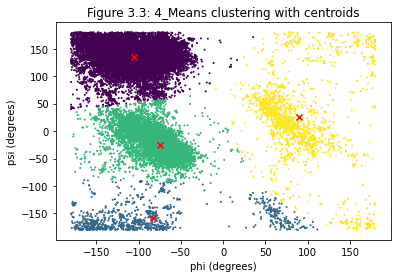

In [6]:
#Repeat same steps as above with k = 4
kmeans_4 = KMeans(n_clusters=4, random_state = 0).fit(tempArray)
fig, ax = plt.subplots()
ax.scatter(tempArray["phi"], tempArray["psi"],s = 1, c=kmeans_4.labels_.astype(float))
ax.set_title('Figure 3.3: 4_Means clustering with centroids')
ax.set(xlabel = 'phi (degrees)', ylabel = 'psi (degrees)')
ax.scatter(kmeans_4.cluster_centers_[:, 0], kmeans_4.cluster_centers_[:, 1], c='red', marker='x')

Figure 3.3 now shows a 4-means clustering. It appears to be a horizontal line running through the lower half at approximately y = -125. The blue cluster does not seem to be reasonable as each half of it is located on either side of phi = 0. As a conslusion, we believe that a k-value of 3 is the most appropriate number of clusters for this data set.

#### b.	Validate the clusters that are found with the chosen value of K.

It is important to note that the initial positions of the centroids matter. In all of Figure 3.1-3.3, the so called "random state" has been chosen to equal to 0. This means that the k-centroids are all initialized at the same spot each time, generating the same result for each k-value. It is therefore important to let the parameter be truly random in order to validate the results. It might look reasonable for one such state but not another.

We are going to generate three graphs, each with a random state, and a k-value of 3 in order to further investigate the validation of the clusters.

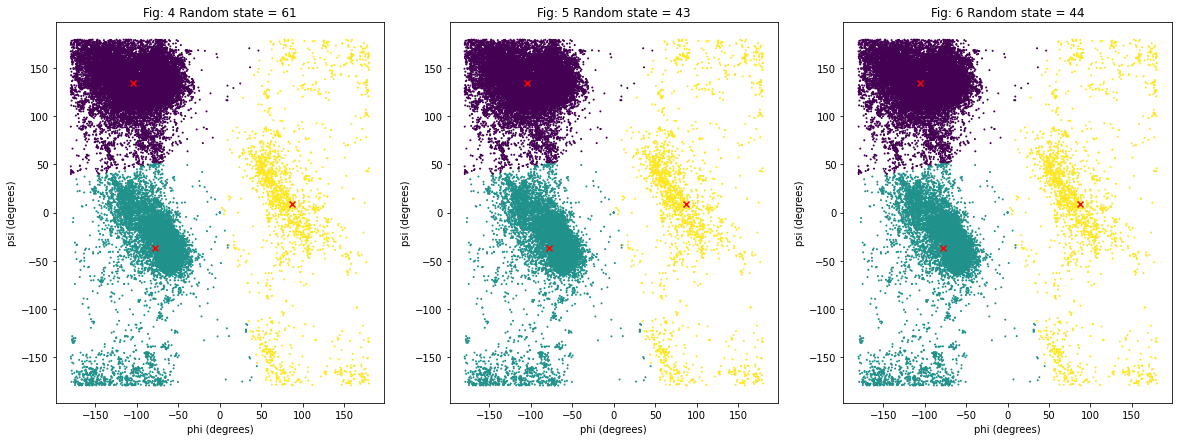

In [7]:
#Create an array with 4 random numbers with a range from 0 to 99
randomStates = random.sample(range(100),3)
#Stacking subplots next to each other
fig, axs = plt.subplots(1,3 )

#Repeat this for-loop for the length of the randomStates-array
for i in range(len(randomStates)): 
    kmeans_3 = KMeans(n_clusters=3, random_state = 0).fit(tempArray)
    axs[i].scatter(tempArray["phi"], tempArray["psi"],s = 1, c=kmeans_3.labels_.astype(float))
    axs[i].set(xlabel = 'phi (degrees)', ylabel = 'psi (degrees)')
    axs[i].set_title('Fig: '+ str(i+4) + ' Random state = '+ str(randomStates[i]))
    axs[i].scatter(kmeans_3.cluster_centers_[:, 0], kmeans_3.cluster_centers_[:, 1], c='red', marker='x')

fig.set_figwidth(20)
fig.set_figheight(7)
plt.show()

Based on the results shown in Figure 4-6, it is reasonable to conclude that the clusters are valid. A more in depth answer is given in task 1.c.

#### c.	Do the clusters found in part (a) seem reasonable? 

Figure 4-6 shows that even though we randomize the instantization of the centroids, the same result is replicated every time. This validates the clusters as well as their responsibility. One would however argue that the bottom part of the graph may be a part of another cluster, as we saw when setting k=4.

#### d.	(For A Higher Grade) Can you change the data such that you reach better results? (Hint: since both phi and psi are periodic attributes, you can think of shifting them by some value and then use the modulo operation.) 


As mentionded earlier, the range of phi and psi defined previously seem to have been "cut off". In other words, the clusters which have been identified in task 2.b reach beyond or "wrap around" certain angles. We can fix this issue and hence obtain a clearer result by plotting the data points in a new coordinate system. From Figure 4 to 6, we can idenfity what seems to be a veritcal and horizontal "limit" at a psi-angle of -100 and a phi-angle of 0. Drawing out these lines, we get:

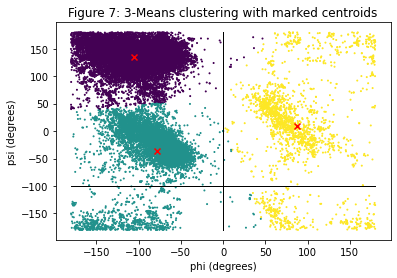

In [8]:
kmeans = KMeans(n_clusters=3, random_state = 0).fit(tempArray)
fig, ax = plt.subplots()

ax.scatter(tempArray["phi"], tempArray["psi"],s = 1, c=kmeans.labels_.astype(float))
ax.set_title('Figure 7: 3-Means clustering with marked centroids')
ax.set(xlabel = 'phi (degrees)', ylabel = 'psi (degrees)')
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')

#Plotting of arbitrary lines
ax.plot([0, 0], [-180, 180], 'k-', lw=1)
ax.plot([-180,180], [-100, -100], 'k-', lw=1)

The lines in figure 7 represent a divison of data points in which an aproximate guide to where the fewest number of points are cut though. We can use this information along with the modulo operation in order to shift the data points. This is done below:     

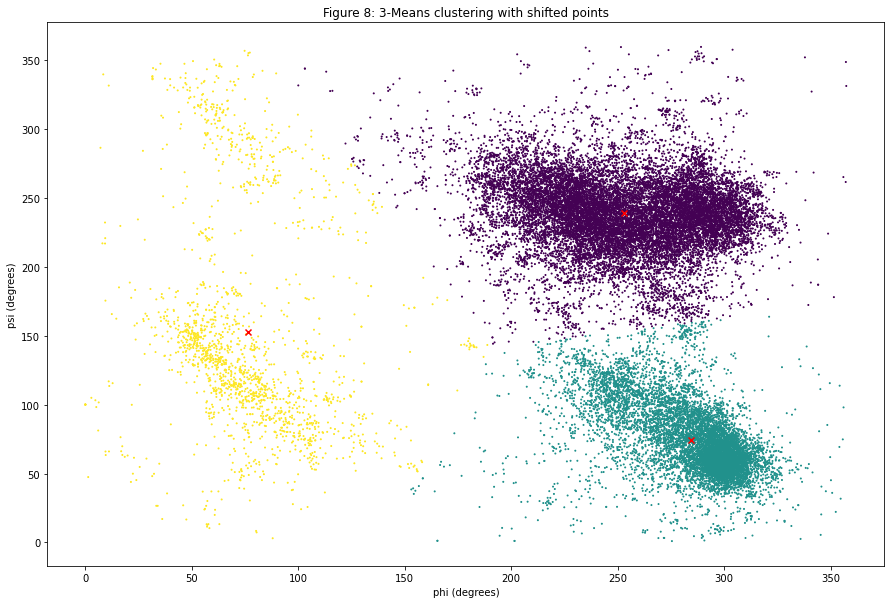

In [66]:
#graph initialization
fig, ax = plt.subplots()

#Copy over previous array with coordinates over to new array
shifted_tempArray = tempArray.copy()

#Shift coordinates
shifted_tempArray['phi']= shifted_tempArray['phi'].mod(360)
shifted_tempArray['psi']= (shifted_tempArray['psi']+100).mod(360)

#Setting up the kmeans parameters
kmeans = KMeans(n_clusters=3, random_state = 0).fit(shifted_tempArray)

#Plotting
ax.scatter(shifted_tempArray["phi"], shifted_tempArray["psi"],s = 1, c=kmeans.labels_.astype(float))
ax.set_title('Figure 8: 3-Means clustering with shifted points')
ax.set(xlabel = 'phi (degrees)', ylabel = 'psi (degrees)')
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')

fig.set_figwidth(15)
fig.set_figheight(10)
plt.show()

We can now see from figure 8 a clear result with more cohesive clustering without as much of separation in between the cluster.

## Task 3
#### a.	Motivate:
#### i.	the choice of the minimum number of samples in the neighborhood for a point to be considered as a core point, and

The choice of the minimum number of samples required for a point to be considered a core point can greatly impact the result of the DBSCAN. Choosing a very low number could result in a lot of noise being included in the clusters and we do not want that. On the other hand, choosing a too large number could result in the clustering of clusters which should not belong to each other. 

In order to invesitgate this further, we are going to make use of the shifted Figure 8 from task 2.d as it is easier to read the figure when the clusters are not cut off. The result is shown below in Figure 9. The value for min_samples (50) was generated by trial and error through manual testing with different values.   

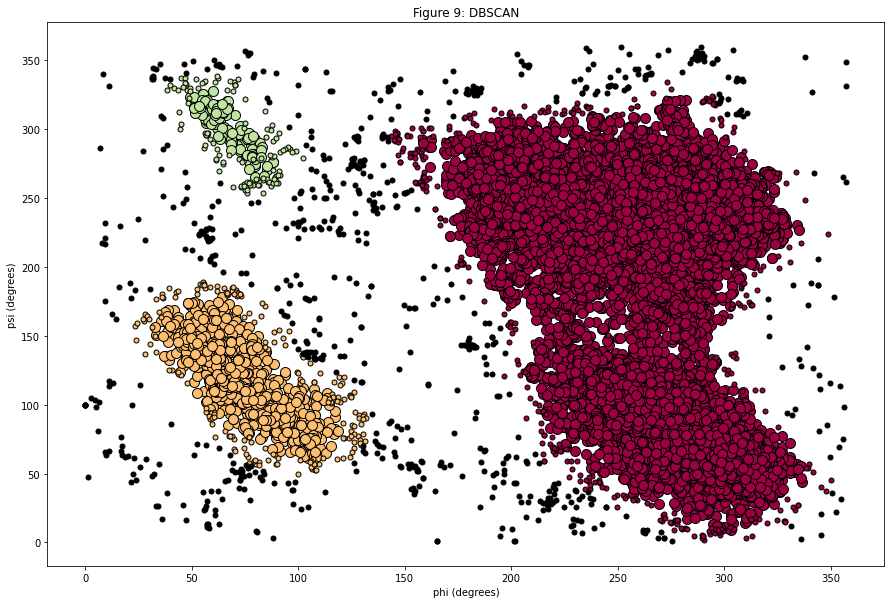

In [67]:
#Initializing figure
fig, ax = plt.subplots()
ax.set_title('Figure 9: DBSCAN')
ax.set(xlabel = 'phi (degrees)', ylabel = 'psi (degrees)')

# Compute DBSCAN
db = DBSCAN(eps=15, min_samples=50).fit(shifted_tempArray)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_


# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

# Plot result
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)
    
    # Core points
    core = shifted_tempArray[class_member_mask & core_samples_mask]
    ax.plot(core["phi"], core["psi"], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=10)
    
    # Noise and border points
    noiseANDborder = shifted_tempArray[class_member_mask & ~core_samples_mask]
    
    # Store outliers in a dataframe to answer question 3.b
    if k == -1:
        outliers = shifted_tempArray[class_member_mask & ~core_samples_mask]
    ax.plot(noiseANDborder["phi"], noiseANDborder["psi"], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=5)

fig.set_figwidth(15)
fig.set_figheight(10)

#### ii.	the choice of the maximum distance between two samples belonging to the same neighbourhood (“eps” or “epsilon”).

The maximum distance between two samples belonging to the same neighborhood can be found by using sklearn.neighbors. It helps us find the distance from each point to its closest neighbor. This is a form of an elbowing technique as seen previously, or in this case, a knee. The n_neighbors is set to that of the min_samples + 1 as the point itself is included. From figure 10, we can see that an eps-value of approximately 15 is suitable.  

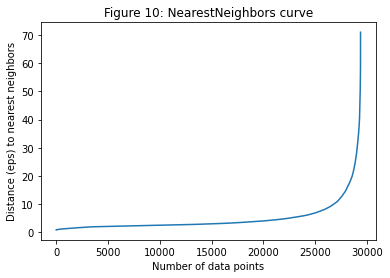

In [68]:
#Initlializing figure
fig, ax = plt.subplots()
ax.set_title('Figure 10: NearestNeighbors curve')
ax.set(xlabel = 'Number of data points', ylabel = 'Distance (eps) to nearest neighbors')

#Setting up the NearestNeighbors-method with n_neighbors=min_samples + 1
neigh = NearestNeighbors(n_neighbors=51)
nbrs = neigh.fit(shifted_tempArray)
#Calculating distances 
distances, indices = nbrs.kneighbors(shifted_tempArray)
#Sorting distances in ascending order
distances = np.sort(distances, axis=0)

plt.plot(distances.transpose()[len(distances.transpose())-1])
plt.show()

#### b.	Highlight the clusters found using DBSCAN and any outliers in a scatter plot. How many outliers are found? Plot a bar chart to show which amino acid residue types are most frequently outliers.

The clusters found using DBSCAN and the outliers (black dots) are shown in Figure 9 above.

In [57]:
print("Number of outliers found: %s" %n_noise_)

Number of outliers found: 723


C:\Users\Lenia\AppData\Local\Temp/ipykernel_10168/1256524147.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers['Residue name'] = outliers.index.to_series().map(data['residue name'])


Text(0.5, 1.0, 'Figure 11: Amino acid residue outliers')

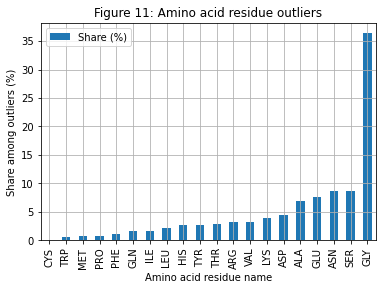

In [69]:
# Add column with residue name to the outliers dataframe by comparing index between 'outliers' and 'data'
outliers['Residue name'] = outliers.index.to_series().map(data['residue name'])

# list with residue name (once)
residueName = []
[residueName.append(i) for i in outliers['Residue name'].values if i not in residueName] 

# Convert outliers['Residue name'] to a list  
allResidueNames = list(outliers['Residue name'])

residueCount = []
share = []
for i in range(len(residueName)):
    # number of occurences of each amino acid residue in 'outliers' 
    residueCount.append(allResidueNames.count(residueName[i])) 
    # share of each amino acid among the outliers
    share.append(residueCount[i]/n_noise_*100)

# Combine the residue name and their share by creating a dataframe
combinedLists = list(zip(residueName, share))
shareResidueName = pd.DataFrame(combinedLists, columns=['Residue name', 'Share (%)'])

# Sorting by column Share (%)'
shareResidueName = shareResidueName.sort_values(by=['Share (%)'])

#Figure
shareResidueName.plot.bar(x='Residue name', y='Share (%)')
plt.grid('on')
plt.xlabel('Amino acid residue name')
plt.ylabel('Share among outliers (%)')
plt.title('Figure 11: Amino acid residue outliers')


On Figure 11, we can see that the amino acid _GLY_ is most frequently outlier followed by _SER_ and _ASN_.

#### c.	Compare the clusters found by DBSCAN with those found using K-means.
Figure 8 illustrates clusters found by using 3-means and Figure 9 illustrates DBSCAN clustering. One can observe that the DBSCAN forms 3 clusters, the same number as the elbow method recommended for the K-means clustering. However, the clusters are formed differently. With the 3-means, the clusters are more or less the same size, while with the DBSCAN, the size varies greatly. The DBSCAN illustrates the outliers apart from the clusters, while the 3-means includes the outliers in the clusters.

#### d.	Discuss whether the clusters found using DBSCAN are robust to small changes in the minimum number of samples in the neighborhood for a point to be considered as a core point, and/or the choice of the maximum distance between two samples belonging to the same neighbourhood (“eps” or “epsilon”).

DBSCAN is not robust to changes mentioned in the problem, it is rather sensitive. Changes in min_samples and eps alter the results quite heavily by the formation of different clusters. As shown in figures 12.1-12.3, small changes of min_smaples and eps with a range between 1-9 results in completely different clusters, not to mention the amount of data points which gets identified as outliers. The epsilon-parameter is more affected by changes as opposed to the min_samples-parameter as seen whenever the min_samples-parameters between figures 12.1-12.3 are close to each other but vary more in epsilon.

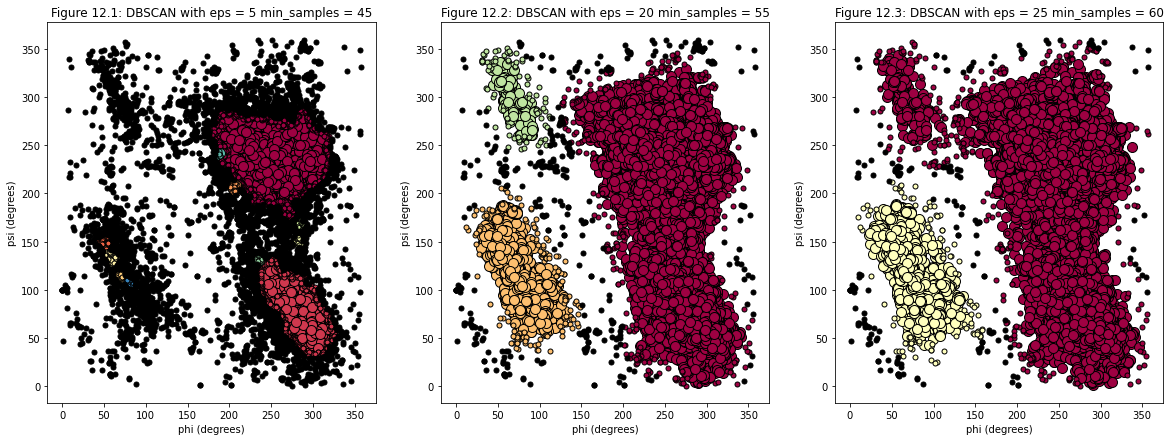

In [82]:
#Stacking subplots next to each other
fig, ax = plt.subplots(1,3)

#Generating new values
newEps = [5,20,25]
newMin_sample = [45,55,60]

#Compute new db with different parameters 
for x in range(len(newEps)):    
    
    e = newEps[x]
    n = newMin_sample[x]
    db = DBSCAN(eps=e, min_samples=n).fit(shifted_tempArray)
    
    # Compute DBSCAN
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)

    # Plot result
    # Black removed and is used for noise instead.
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each)
              for each in np.linspace(0, 1, len(unique_labels))]

    ax[x].set_title('Figure 12.' + str(x+1)+ ': DBSCAN with eps = ' + str(e) + ' min_samples = '+ str(n))
    ax[x].set(xlabel = 'phi (degrees)', ylabel = 'psi (degrees)')
    
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]

        class_member_mask = (labels == k)

        # Core points
        core = shifted_tempArray[class_member_mask & core_samples_mask]
        ax[x].plot(core["phi"], core["psi"], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=10)

        # Noise and border points
        noiseANDborder = shifted_tempArray[class_member_mask & ~core_samples_mask]

        # Store outliers in a dataframe to answer question 3.b
        if k == -1:
            outliers = shifted_tempArray[class_member_mask & ~core_samples_mask]
        ax[x].plot(noiseANDborder["phi"], noiseANDborder["psi"], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=5)
fig.set_figwidth(20)
fig.set_figheight(7)
plt.show()

## Task 4

#### The data file can be stratified by amino acid residue type. Investigate how the clusters found for amino acid residues of type PRO differ from the general clusters. Similarly, investigate how the clusters found for amino acid residues of type GLY differ from the general clusters. Remember that parameters might have to be adjusted from those used in previous questions.

With the specific amino acids (PRO and GLY), one can see on Figures 12.2/12.4 and 13.2/13.4 that the respective DBSCAN and K-means clusters are similar, while the general clusters differed with the two methods.   

In [86]:
dataPRO = shifted_data.loc[shifted_data['residue name']=='PRO']

print('Amino acid residues of type PRO')
#Create figure and stack subplots next to each other
fig, axs = plt.subplots(2, 2)

# ---------------------------- K-Mean ---------------------------------------------------------------------------
#We can find a suitable k-value with the help of the elbow method

#Take out only coordinates
tempArray= dataPRO[["phi", "psi"]]

calculatedDistances = []
#Calculate distances
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(tempArray)
    calculatedDistances.append(kmeanModel.inertia_)
    
#Plot the elbow-graph
axs[0, 0].plot(K, calculatedDistances)
axs[0, 0].set_xticks(range(1, 10))
axs[0, 0].set_xlabel('K-value: Number of clusters')
axs[0, 0].set_ylabel('Distances')
axs[0, 0].set_title('Figure 13.1: Elbow method')

# Perform K-Means clustering by specifying the number of clusters and fiting the data
kmeans = KMeans(n_clusters=2, random_state = 0).fit(tempArray)

#Scatter the dots and color depending on repsective cluster
axs[0, 1].scatter(tempArray["phi"], tempArray["psi"],s = 1, c=kmeans.labels_.astype(float))
#Setting the title of the subgraph
axs[0, 1].set_title('Figure 13.2: 2_Means clustering with centroids')
#Setting the x and y-labels of the subgraph
axs[0, 1].set(xlabel = 'phi (degrees)', ylabel = 'psi (degrees)')
#Scatter the graph using kmeans and mark out the centroids
axs[0, 1].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')

# ---------------------------- DBSCAN ---------------------------------------------------------------------------

#Setting up the NearestNeighbors-method with n_neighbors=min_samples + 1
min_samples = 25
neigh = NearestNeighbors(n_neighbors=min_samples)
nbrs = neigh.fit(tempArray)
#Calculating distances 
distances, indices = nbrs.kneighbors(tempArray)
#Sorting distances in ascending order
distances = np.sort(distances, axis=0)

axs[1, 0].plot(distances.transpose()[len(distances.transpose())-1])
axs[1,0].set_title('Figure 13.3: NearestNeighbors curve')
axs[1,0].set(xlabel = 'Number of data points', ylabel = 'Distance (eps) to nearest neighbors')
axs[1,0].grid('on')

# Compute DBSCAN
db = DBSCAN(eps=20, min_samples=min_samples).fit(tempArray) # CHANGE HERE
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

# Plot result
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)
    
    # Core points
    core = tempArray[class_member_mask & core_samples_mask]
    axs[1,1].plot(core["phi"], core["psi"], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=10)
    
    # Noise and border points
    noiseANDborder = tempArray[class_member_mask & ~core_samples_mask]
    
    # Store outliers in a dataframe to answer question 3.b
    if k == -1:
        outliers = tempArray[class_member_mask & ~core_samples_mask]
    axs[1,1].plot(noiseANDborder["phi"], noiseANDborder["psi"], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=5)

axs[1,1].set_title('Figure 13.4: DBSCAN')
axs[1,1].set(xlabel = 'phi (degrees)', ylabel = 'psi (degrees)')

fig.set_figwidth(18)
fig.set_figheight(12)

NameError: name 'shifted_data' is not defined

In [65]:
dataPRO = shifted_data.loc[shifted_data['residue name']=='GLY']

print('Amino acid residues of type GLY')
#Create figure and stack subplots next to each other
fig, axs = plt.subplots(2, 2)

# ---------------------------- K-Mean ---------------------------------------------------------------------------
#We can find a suitable k-value with the help of the elbow method

#Take out only coordinates
tempArray= dataPRO[["phi", "psi"]]

calculatedDistances = []
#Calculate distances
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(tempArray)
    calculatedDistances.append(kmeanModel.inertia_)
    
#Plot the elbow-graph
axs[0, 0].plot(K, calculatedDistances)
axs[0, 0].set_xticks(range(1, 10))
axs[0, 0].set_xlabel('K-value: Number of clusters')
axs[0, 0].set_ylabel('Distances')
axs[0, 0].set_title('Figure 13.1: Elbow method')

# Perform K-Means clustering by specifying the number of clusters and fiting the data
kmeans = KMeans(n_clusters=3, random_state = 0).fit(tempArray)

#Scatter the dots and color depending on repsective cluster
axs[0, 1].scatter(tempArray["phi"], tempArray["psi"],s = 1, c=kmeans.labels_.astype(float))
#Setting the title of the subgraph
axs[0, 1].set_title('Figure 13.2: 3_Means clustering with centroids')
#Setting the x and y-labels of the subgraph
axs[0, 1].set(xlabel = 'phi (degrees)', ylabel = 'psi (degrees)')
#Scatter the graph using kmeans and mark out the centroids
axs[0, 1].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')

# ---------------------------- DBSCAN ---------------------------------------------------------------------------

#Setting up the NearestNeighbors-method with n_neighbors=min_samples + 1
min_samples = 25
neigh = NearestNeighbors(n_neighbors=min_samples+1)
nbrs = neigh.fit(tempArray)
#Calculating distances 
distances, indices = nbrs.kneighbors(tempArray)
#Sorting distances in ascending order
distances = np.sort(distances, axis=0)

axs[1, 0].plot(distances.transpose()[len(distances.transpose())-1])
axs[1,0].set_title('Figure 13.3: NearestNeighbors curve')
axs[1,0].set(xlabel = 'Number of data points', ylabel = 'Distance (eps) to nearest neighbors')
axs[1,0].grid('on')

# Compute DBSCAN
db = DBSCAN(eps=30, min_samples=min_samples).fit(tempArray) # CHANGE HERE
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

# Plot result
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)
    
    # Core points
    core = tempArray[class_member_mask & core_samples_mask]
    axs[1,1].plot(core["phi"], core["psi"], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=10)
    
    # Noise and border points
    noiseANDborder = tempArray[class_member_mask & ~core_samples_mask]
    
    # Store outliers in a dataframe to answer question 3.b
    if k == -1:
        outliers = tempArray[class_member_mask & ~core_samples_mask]
    axs[1,1].plot(noiseANDborder["phi"], noiseANDborder["psi"], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=5)

axs[1,1].set_title('Figure 13.4: DBSCAN')
axs[1,1].set(xlabel = 'phi (degrees)', ylabel = 'psi (degrees)')

fig.set_figwidth(18)
fig.set_figheight(12)

NameError: name 'shifted_data' is not defined